## download from https://wandb.ai/liki/DIRG_020_abalation4/table

In [4]:
%load_ext autoreload
%autoreload 2
!CUDA_VISIBLE_DEVICES=7 
import sys
sys.path.insert(0, '/home/user/LQ/B_Signal/Transparent_information_fusion/post/')  # 添加上一级目录到系统路径

from A1_plot_config import configure_matplotlib
configure_matplotlib(style='ieee', font_lang='en')
# %reload_ext autoreload

import os

# 修改当前工作目录
root_dir = '/home/user/LQ/B_Signal/Transparent_information_fusion/'
os.chdir(root_dir)

## 读取

In [10]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('post/Attention_paper/wandb_ablation.csv')

# 选择需要的列
selected_columns = df[['script','l1_norm', 'learning_rate', 'val_acc']]

# 显示选中的列
print(selected_columns)
WF = selected_columns[selected_columns['script'] == 'configs/DIRG_020/config_NNSPN_ablation_onlyWF.yaml']
Mean = selected_columns[selected_columns['script'] == 'configs/DIRG_020/config_NNSPN_ablation_onlyMean.yaml']
Kurtosis = selected_columns[selected_columns['script'] == 'configs/DIRG_020/config_NNSPN_ablation_onlyKurtosis.yaml']
I = selected_columns[selected_columns['script'] == 'configs/DIRG_020/config_NNSPN_ablation_onlyI.yaml']
HT = selected_columns[selected_columns['script'] == 'configs/DIRG_020/config_NNSPN_ablation_onlyHT.yaml']
NNSPN = selected_columns[selected_columns['script'] == 'configs/DIRG_020/config_NNSPN.yaml']

matrix_list = {
    'wf': WF,
    'mean': Mean,
    'kurtosis': Kurtosis,
    'i': I,
    'ht': HT,
    'nnspn': NNSPN
}

                                                script  l1_norm  \
0    configs/DIRG_020/config_NNSPN_ablation_onlyWF....  0.00001   
1    configs/DIRG_020/config_NNSPN_ablation_onlyMea...  0.00001   
2    configs/DIRG_020/config_NNSPN_ablation_onlyKur...  0.00001   
3    configs/DIRG_020/config_NNSPN_ablation_onlyI.yaml  0.00001   
4    configs/DIRG_020/config_NNSPN_ablation_onlyHT....  0.00001   
..                                                 ...      ...   
145  configs/DIRG_020/config_NNSPN_ablation_onlyMea...  0.10000   
146  configs/DIRG_020/config_NNSPN_ablation_onlyKur...  0.10000   
147  configs/DIRG_020/config_NNSPN_ablation_onlyI.yaml  0.10000   
148  configs/DIRG_020/config_NNSPN_ablation_onlyHT....  0.10000   
149                 configs/DIRG_020/config_NNSPN.yaml  0.10000   

     learning_rate   val_acc  
0          0.00001  0.080000  
1          0.00001  0.142857  
2          0.00001  0.142857  
3          0.00001  0.120000  
4          0.00001  0.320000  
..       

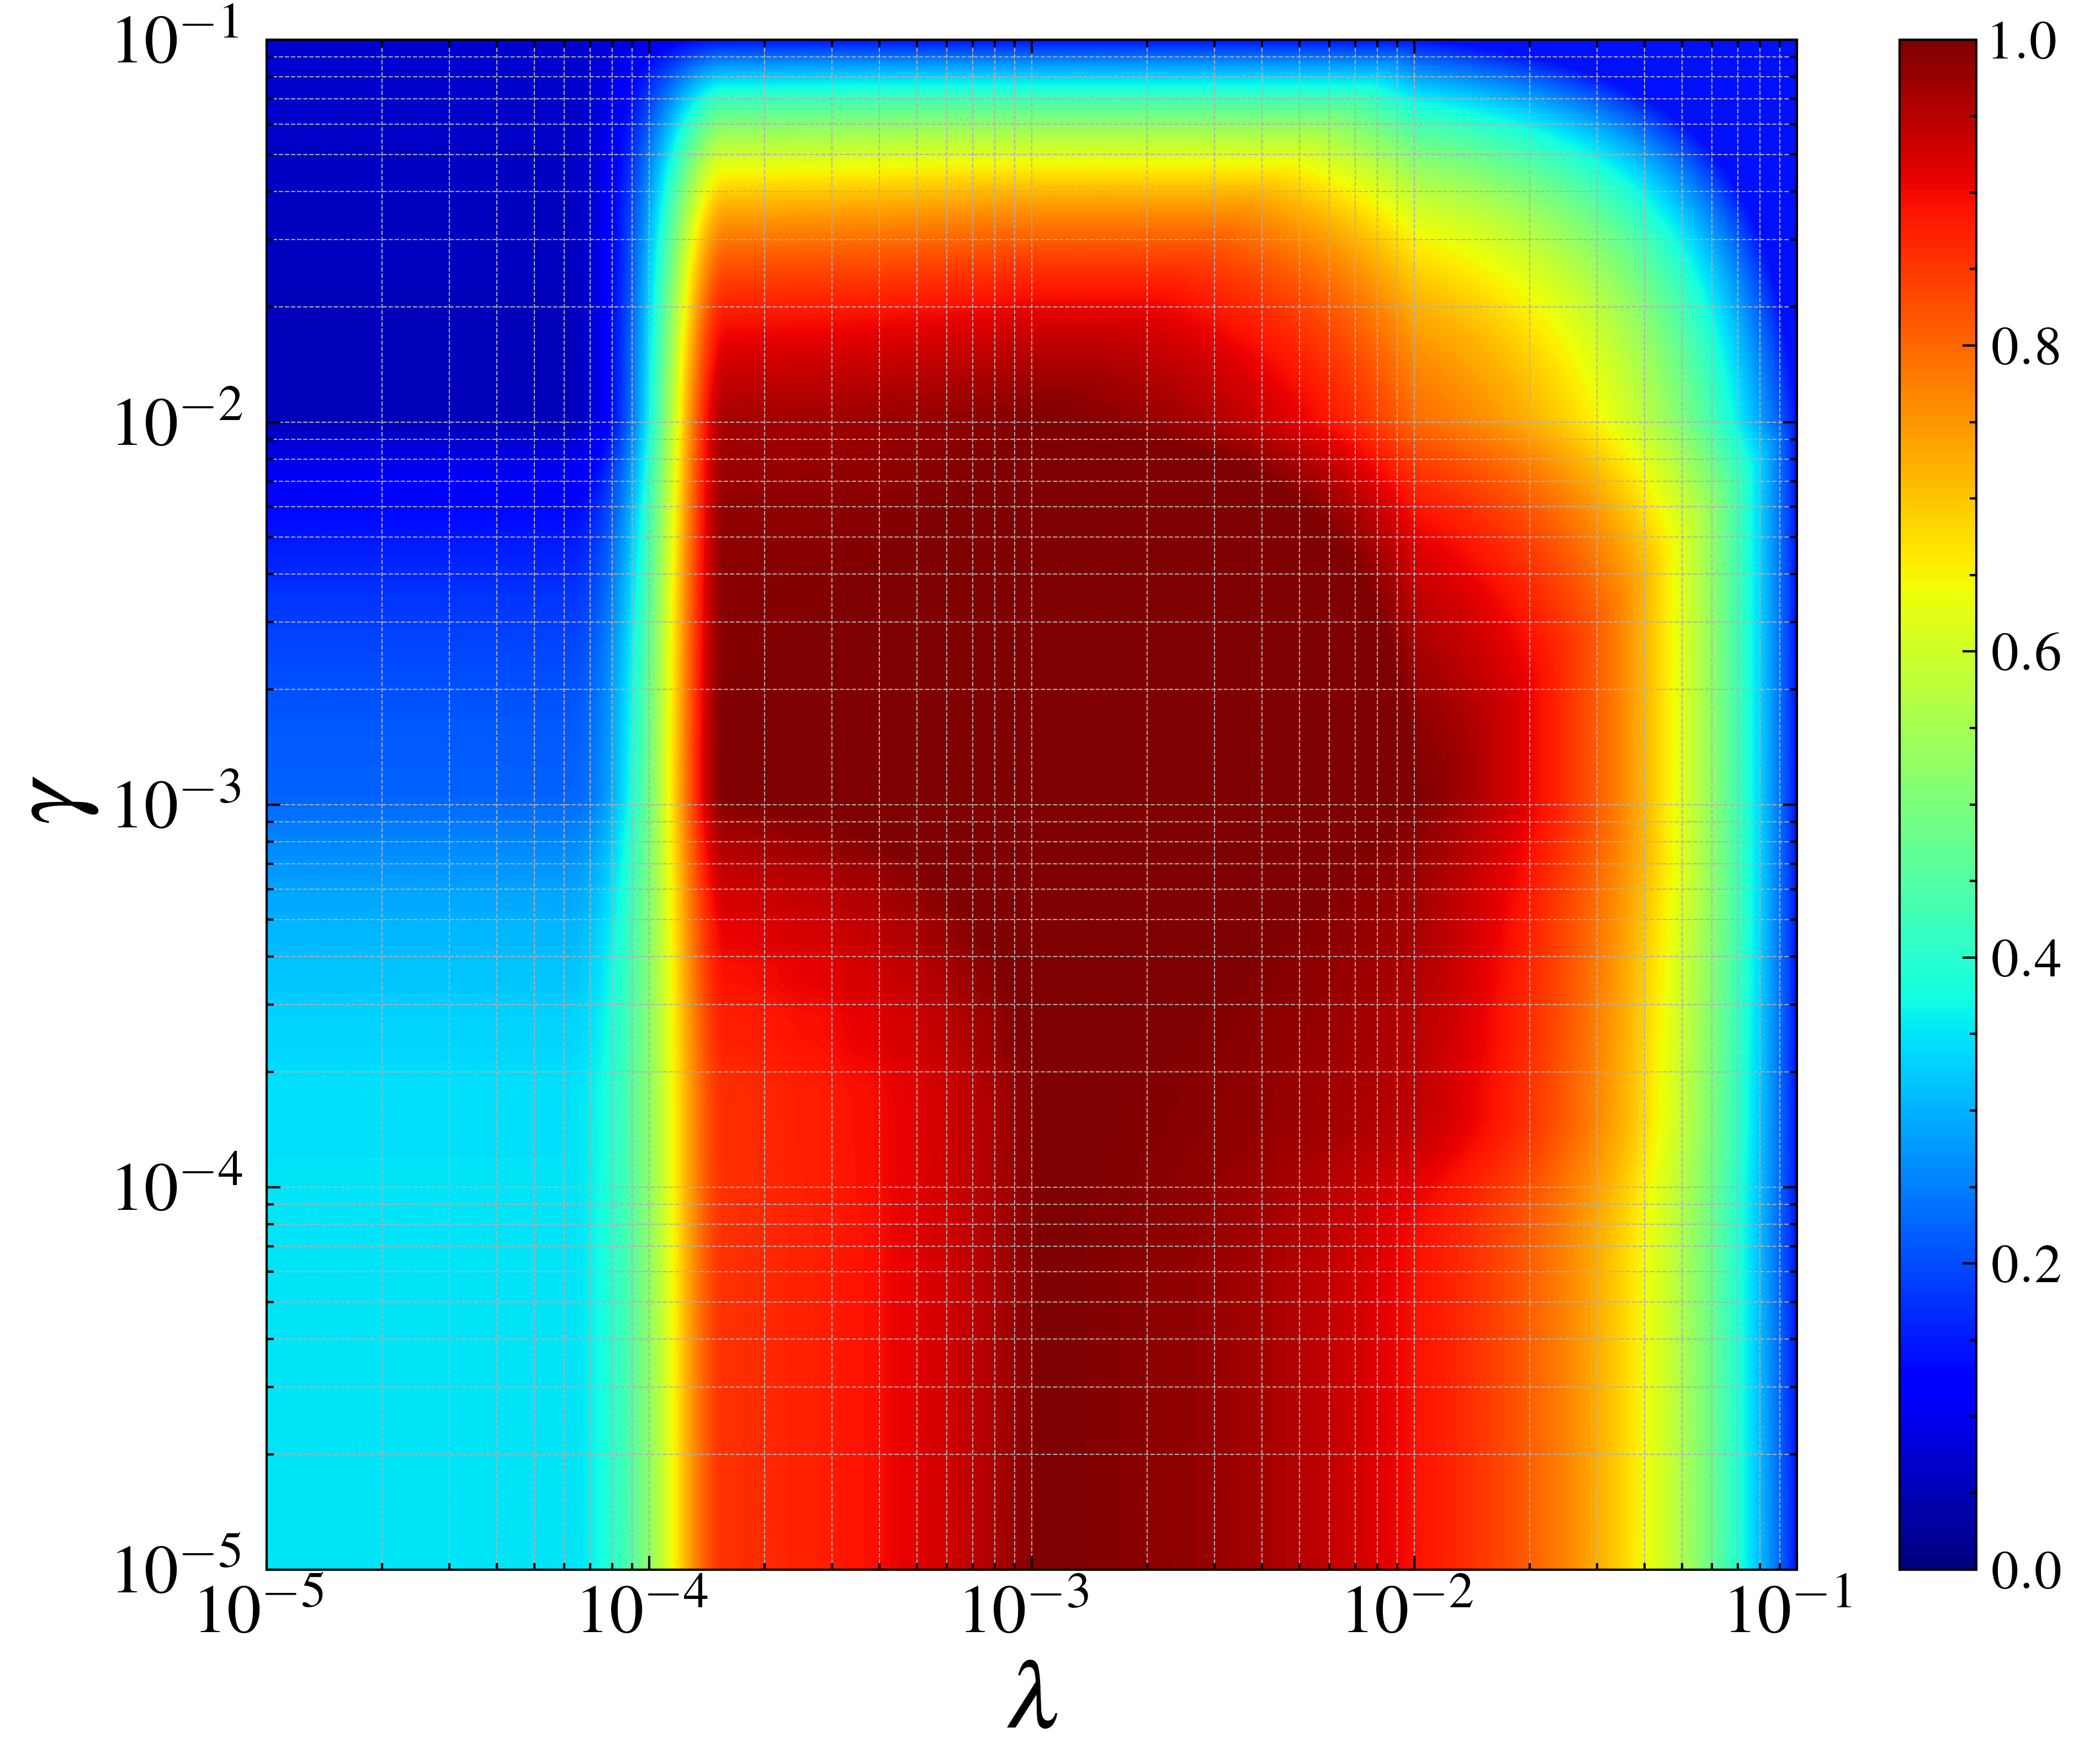

In [17]:
from A8_hyperparameter import plot_hyperparameters


plot_hyperparameters(NNSPN['learning_rate'], NNSPN['l1_norm'],
                     NNSPN['val_acc'], '$\lambda$','$\gamma$',
                     './plot', filename = 'all', method='linear',log_scale = True,cmap = 'jet',
                      vmin=0, vmax=1)

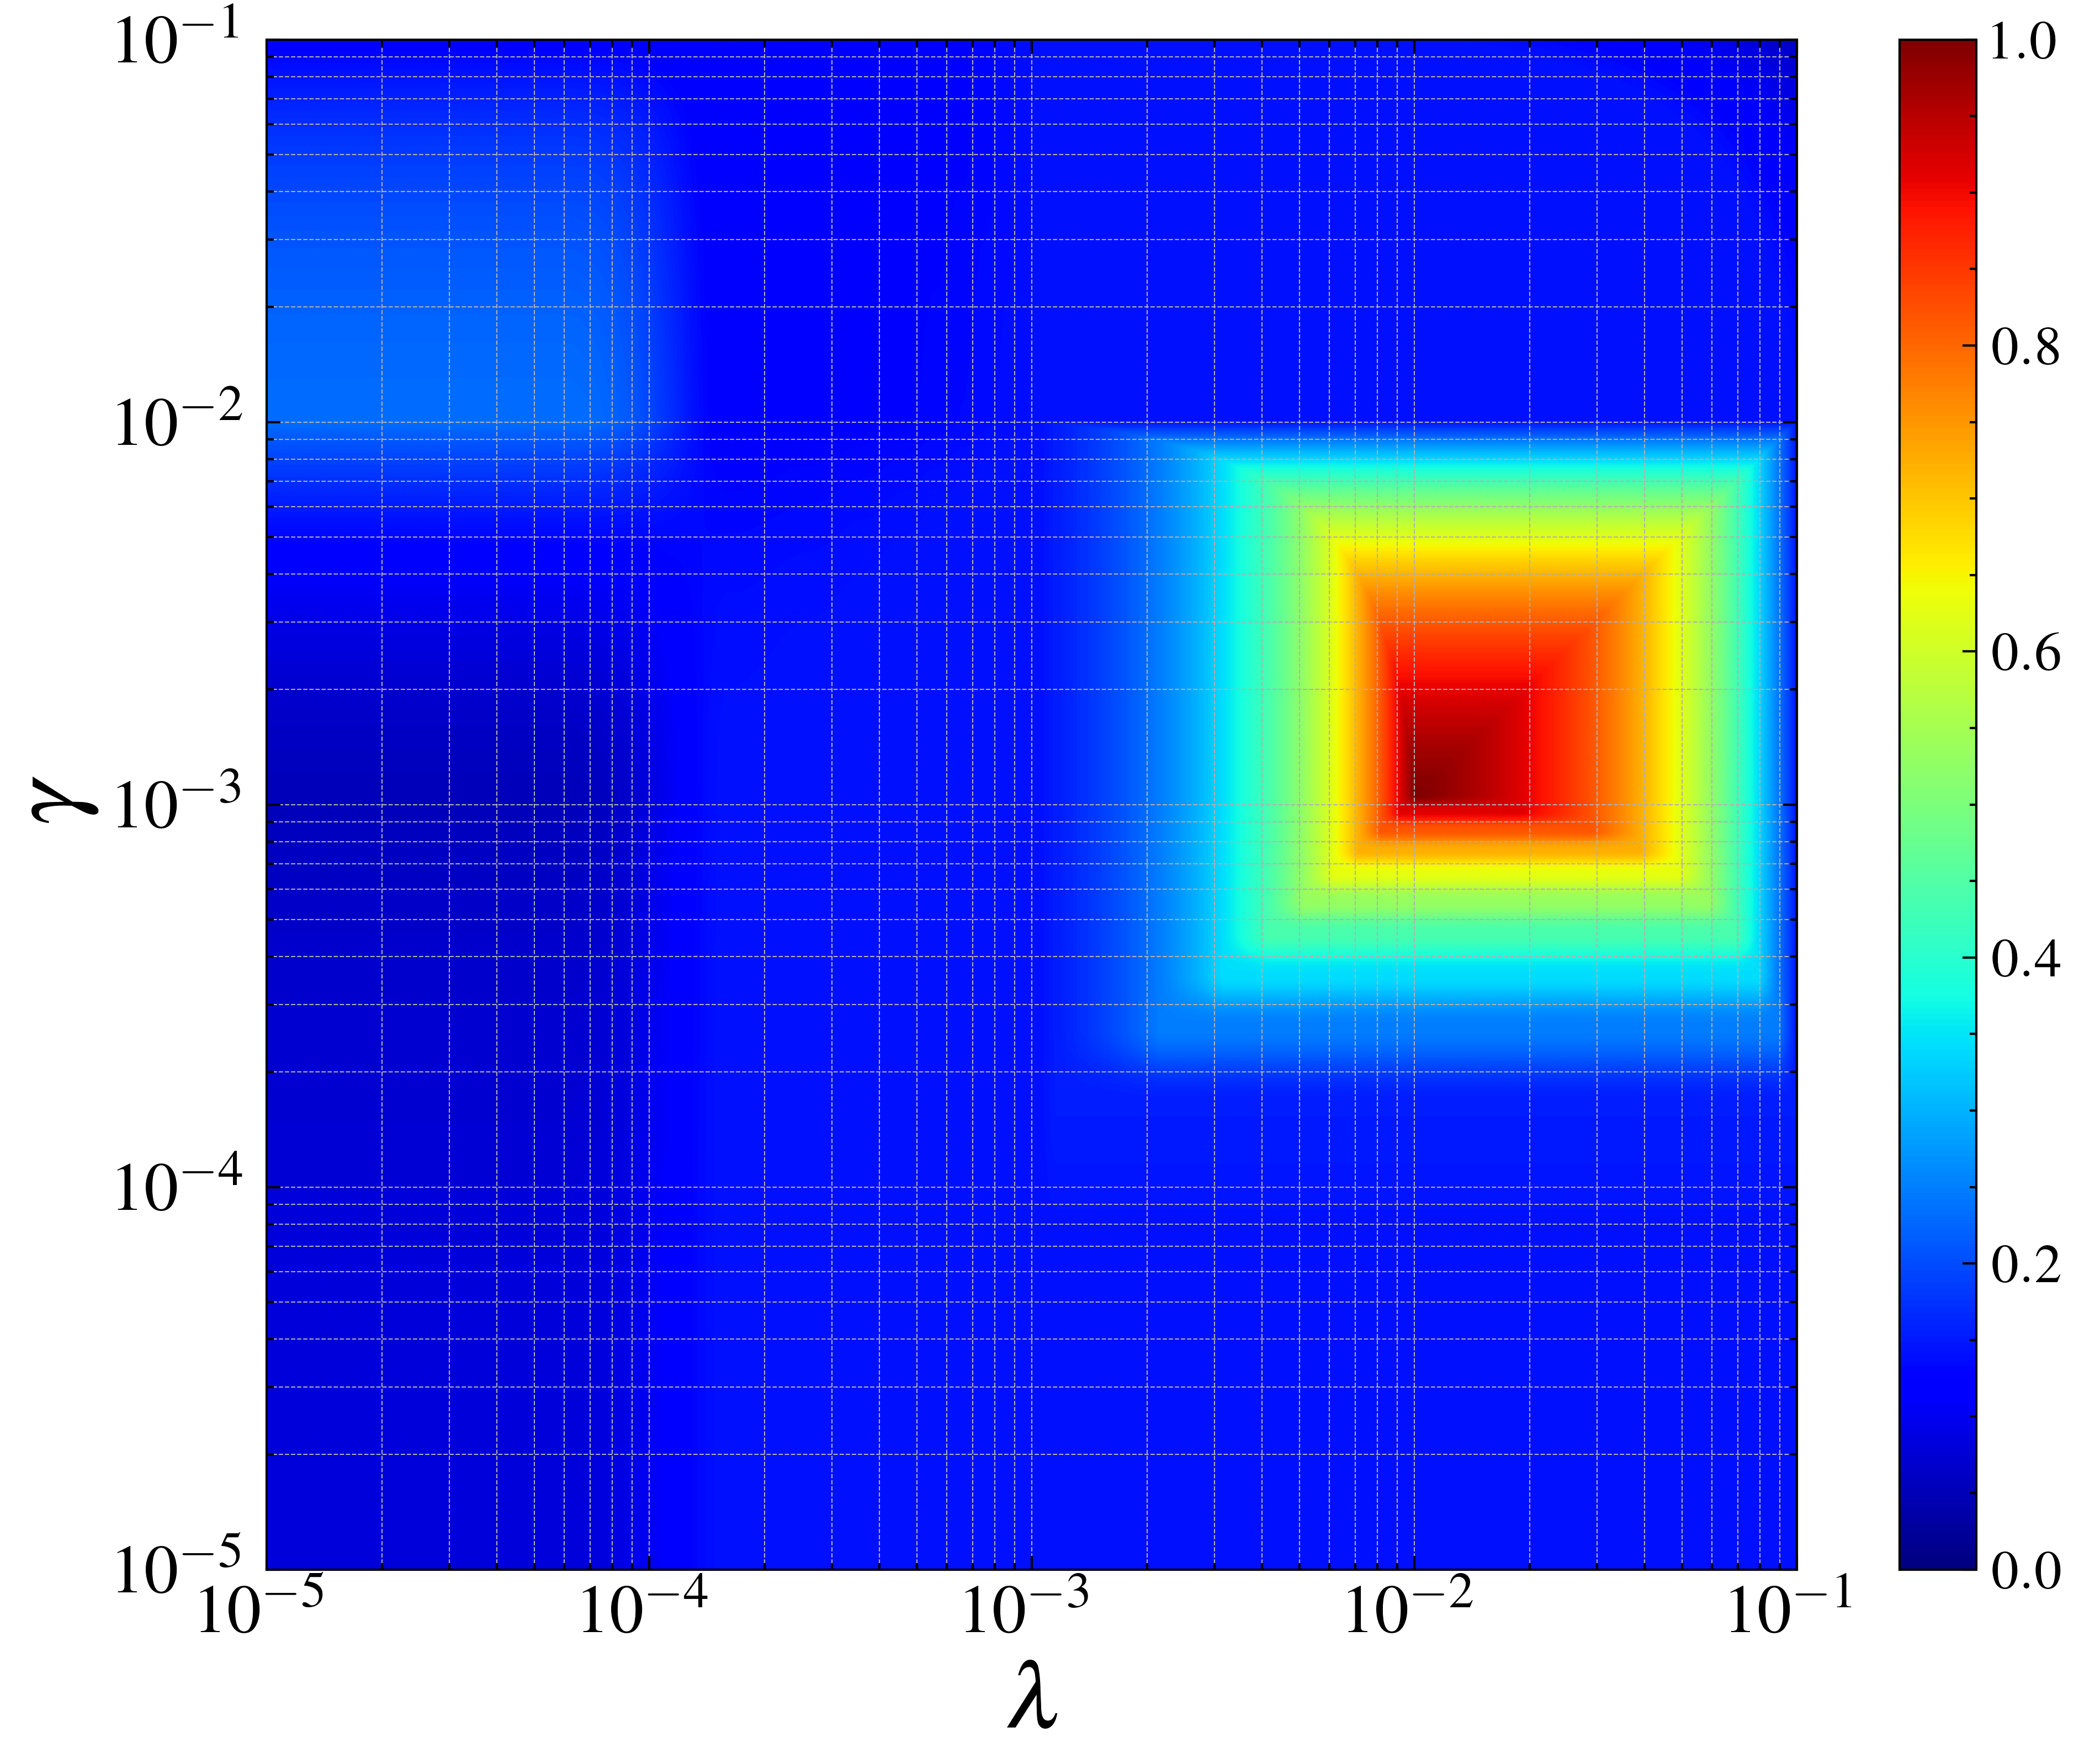

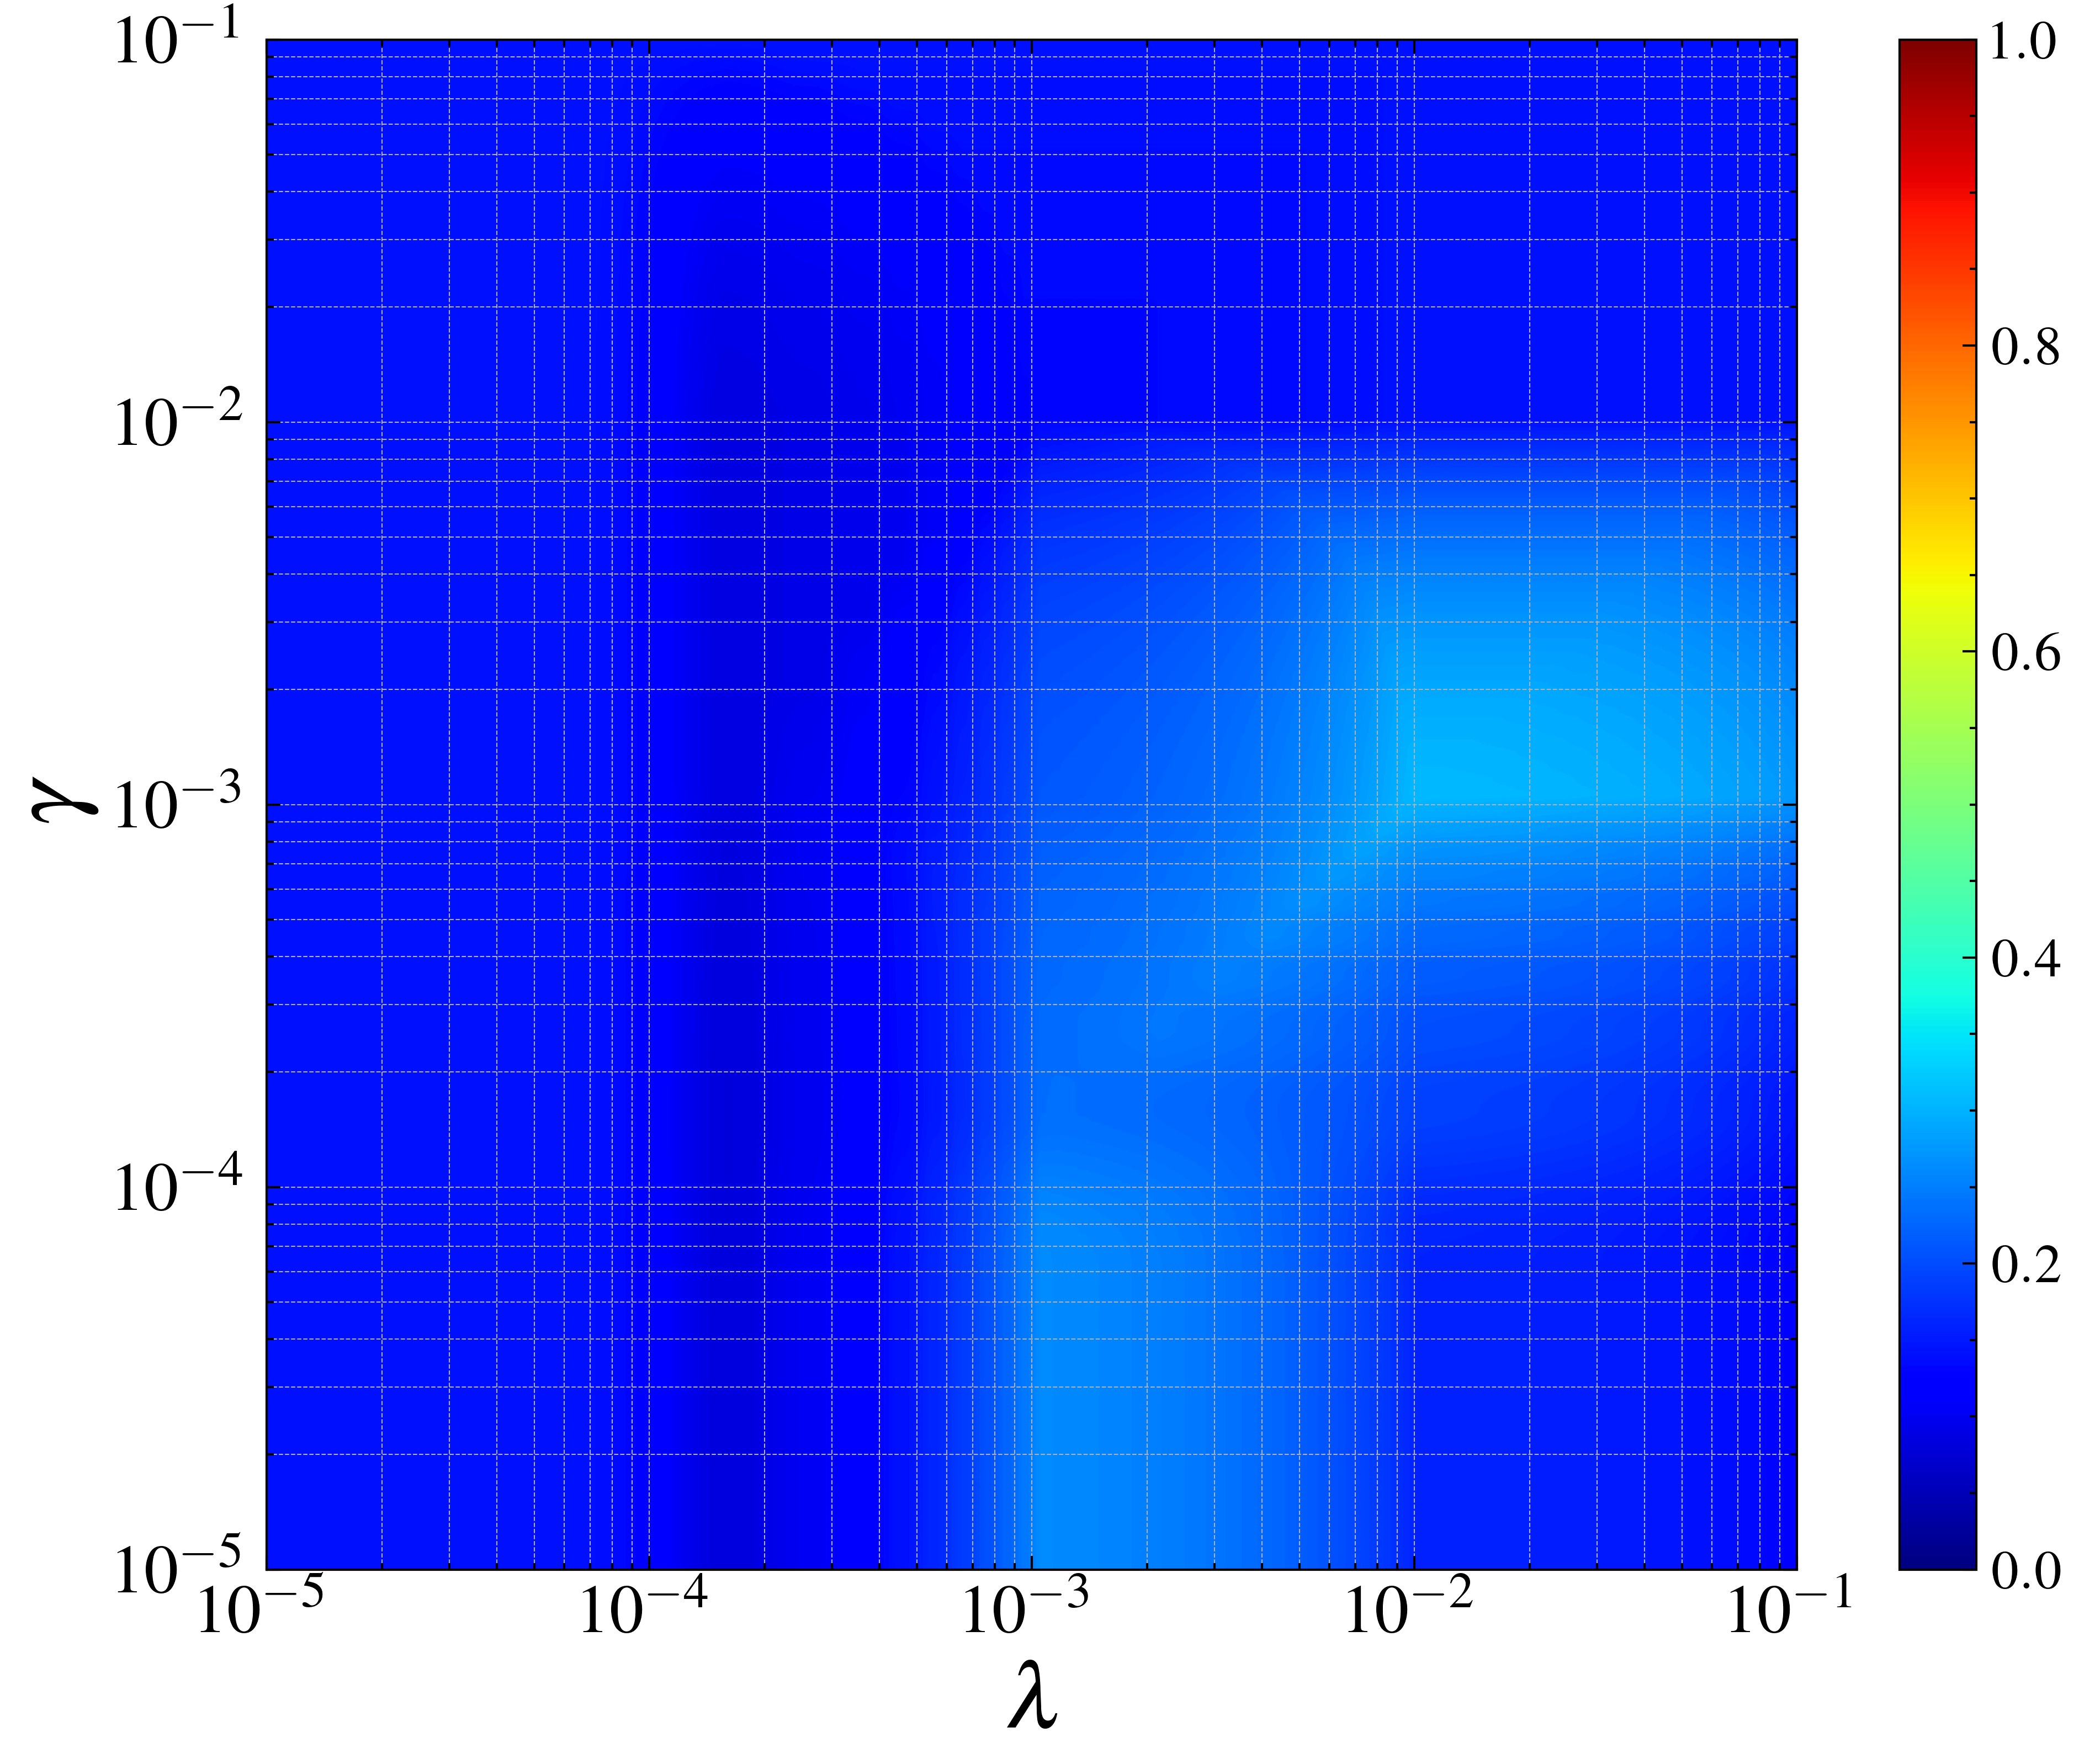

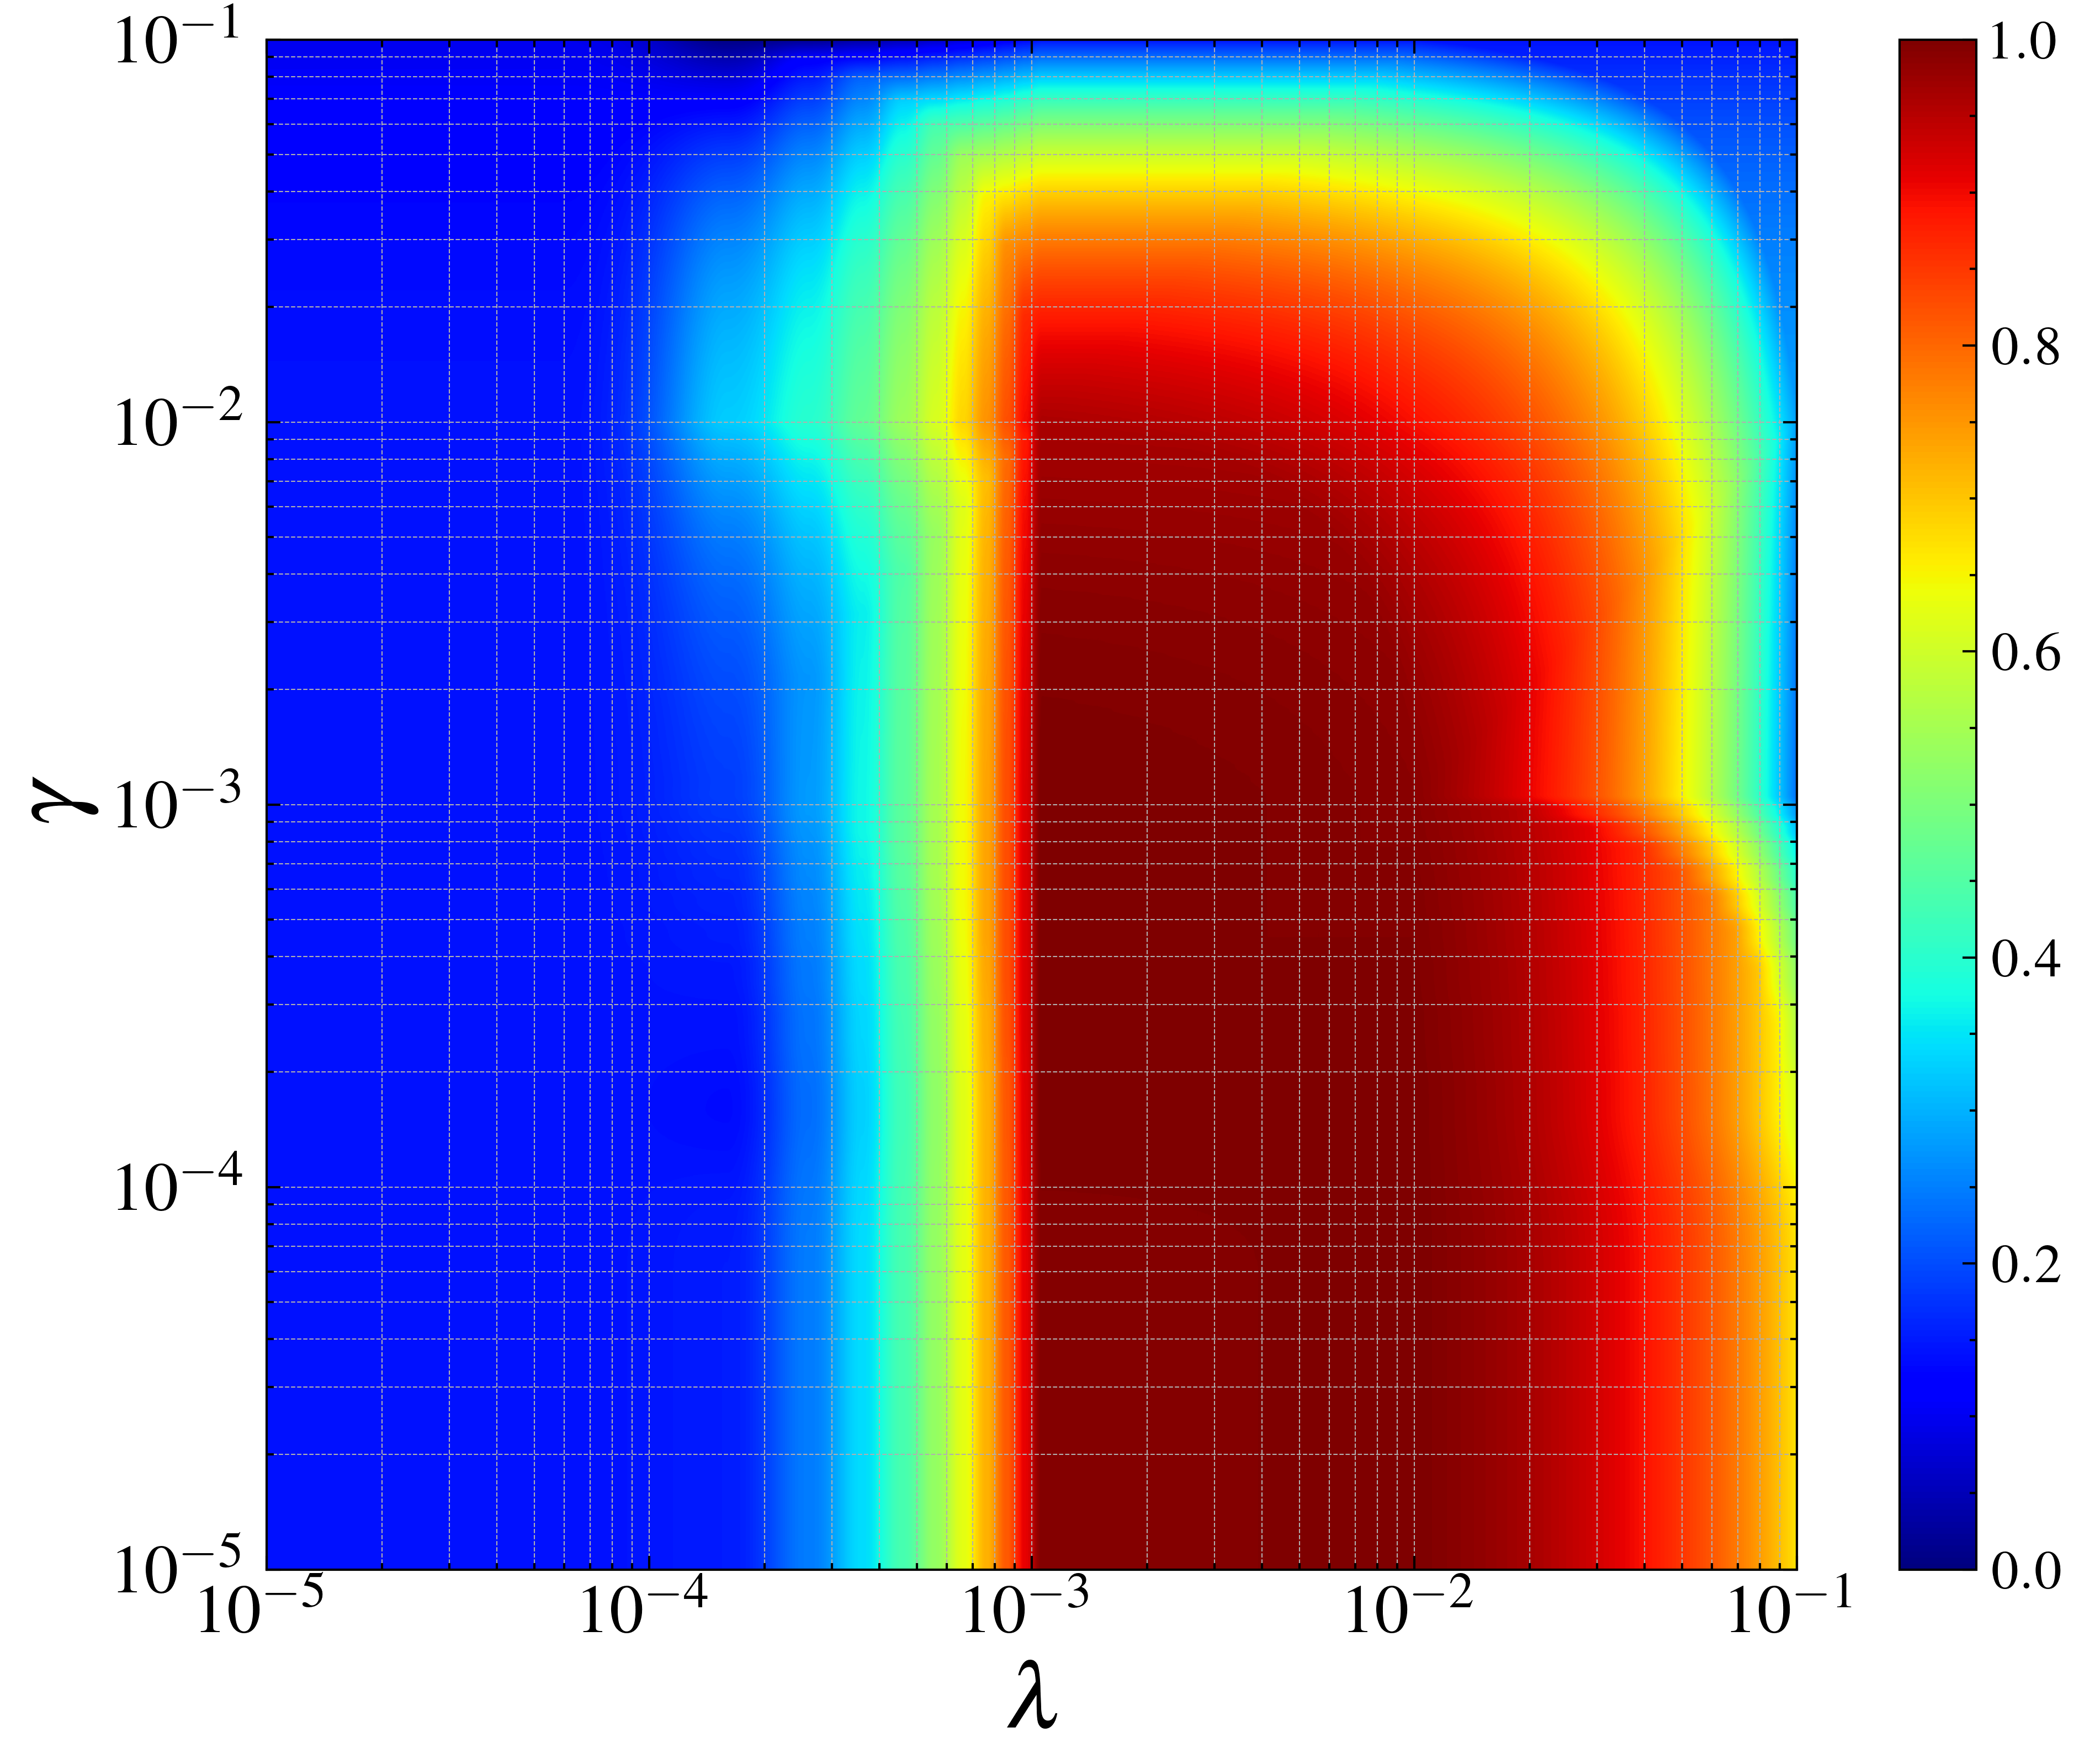

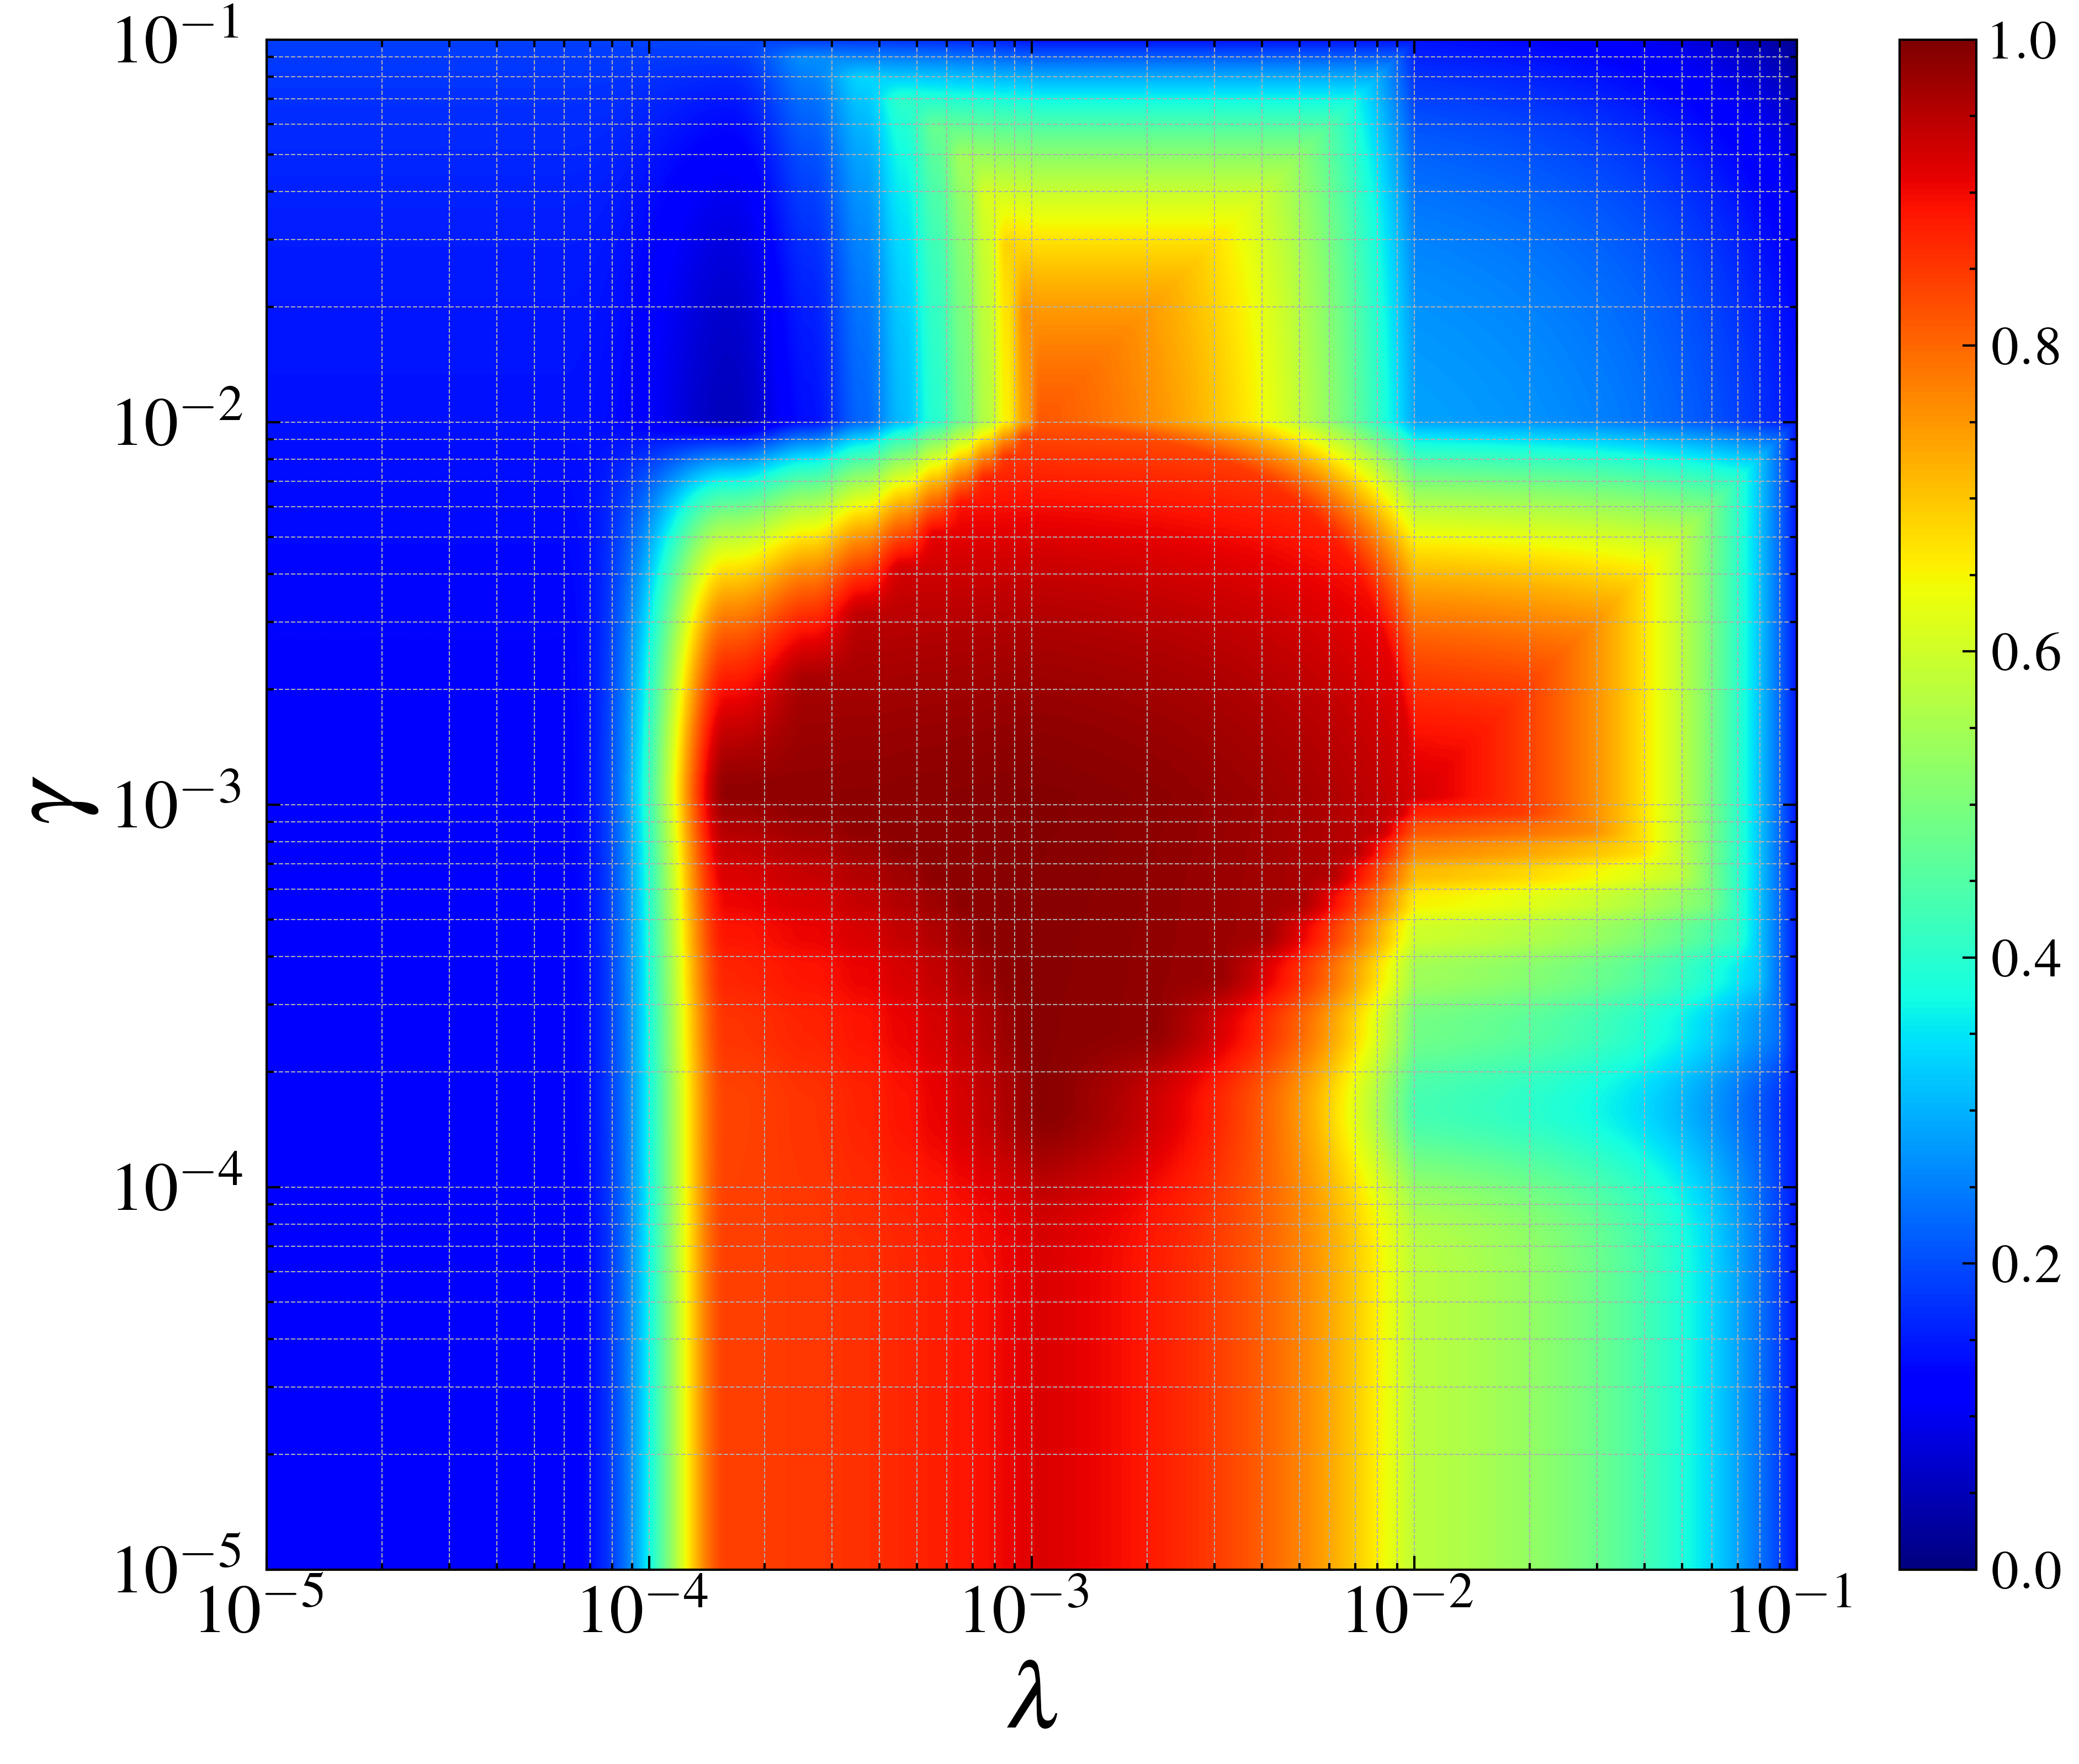

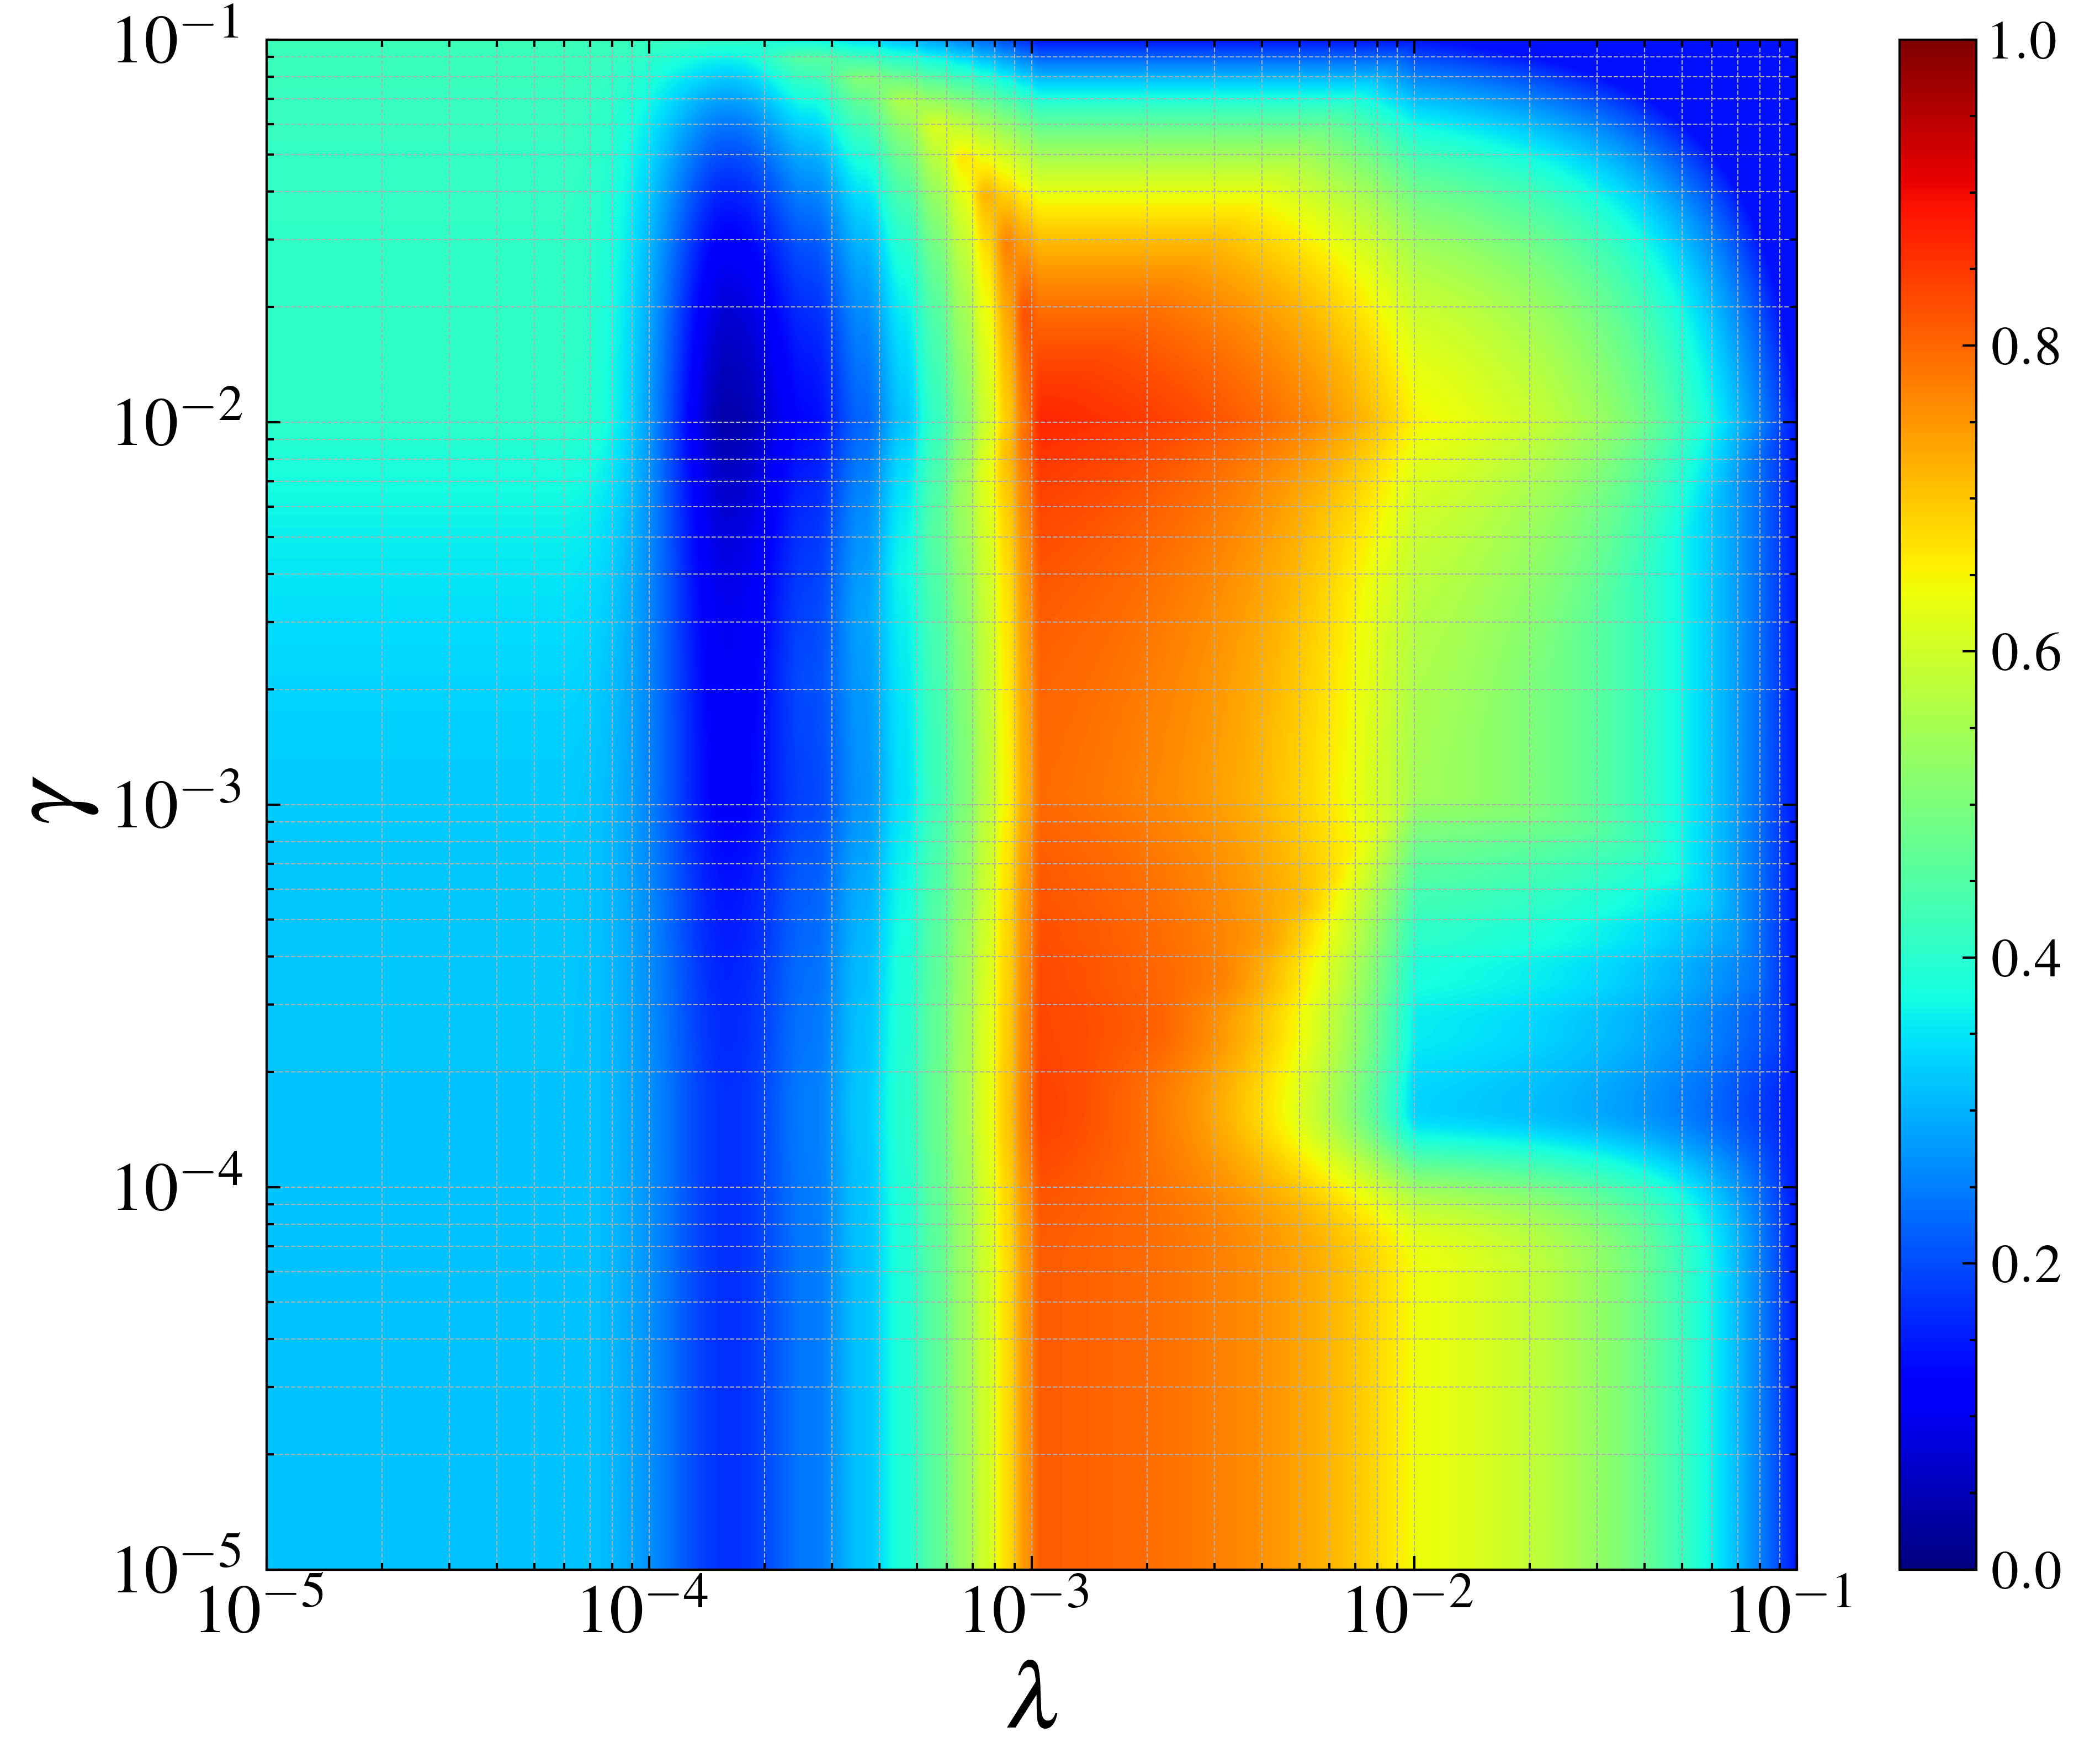

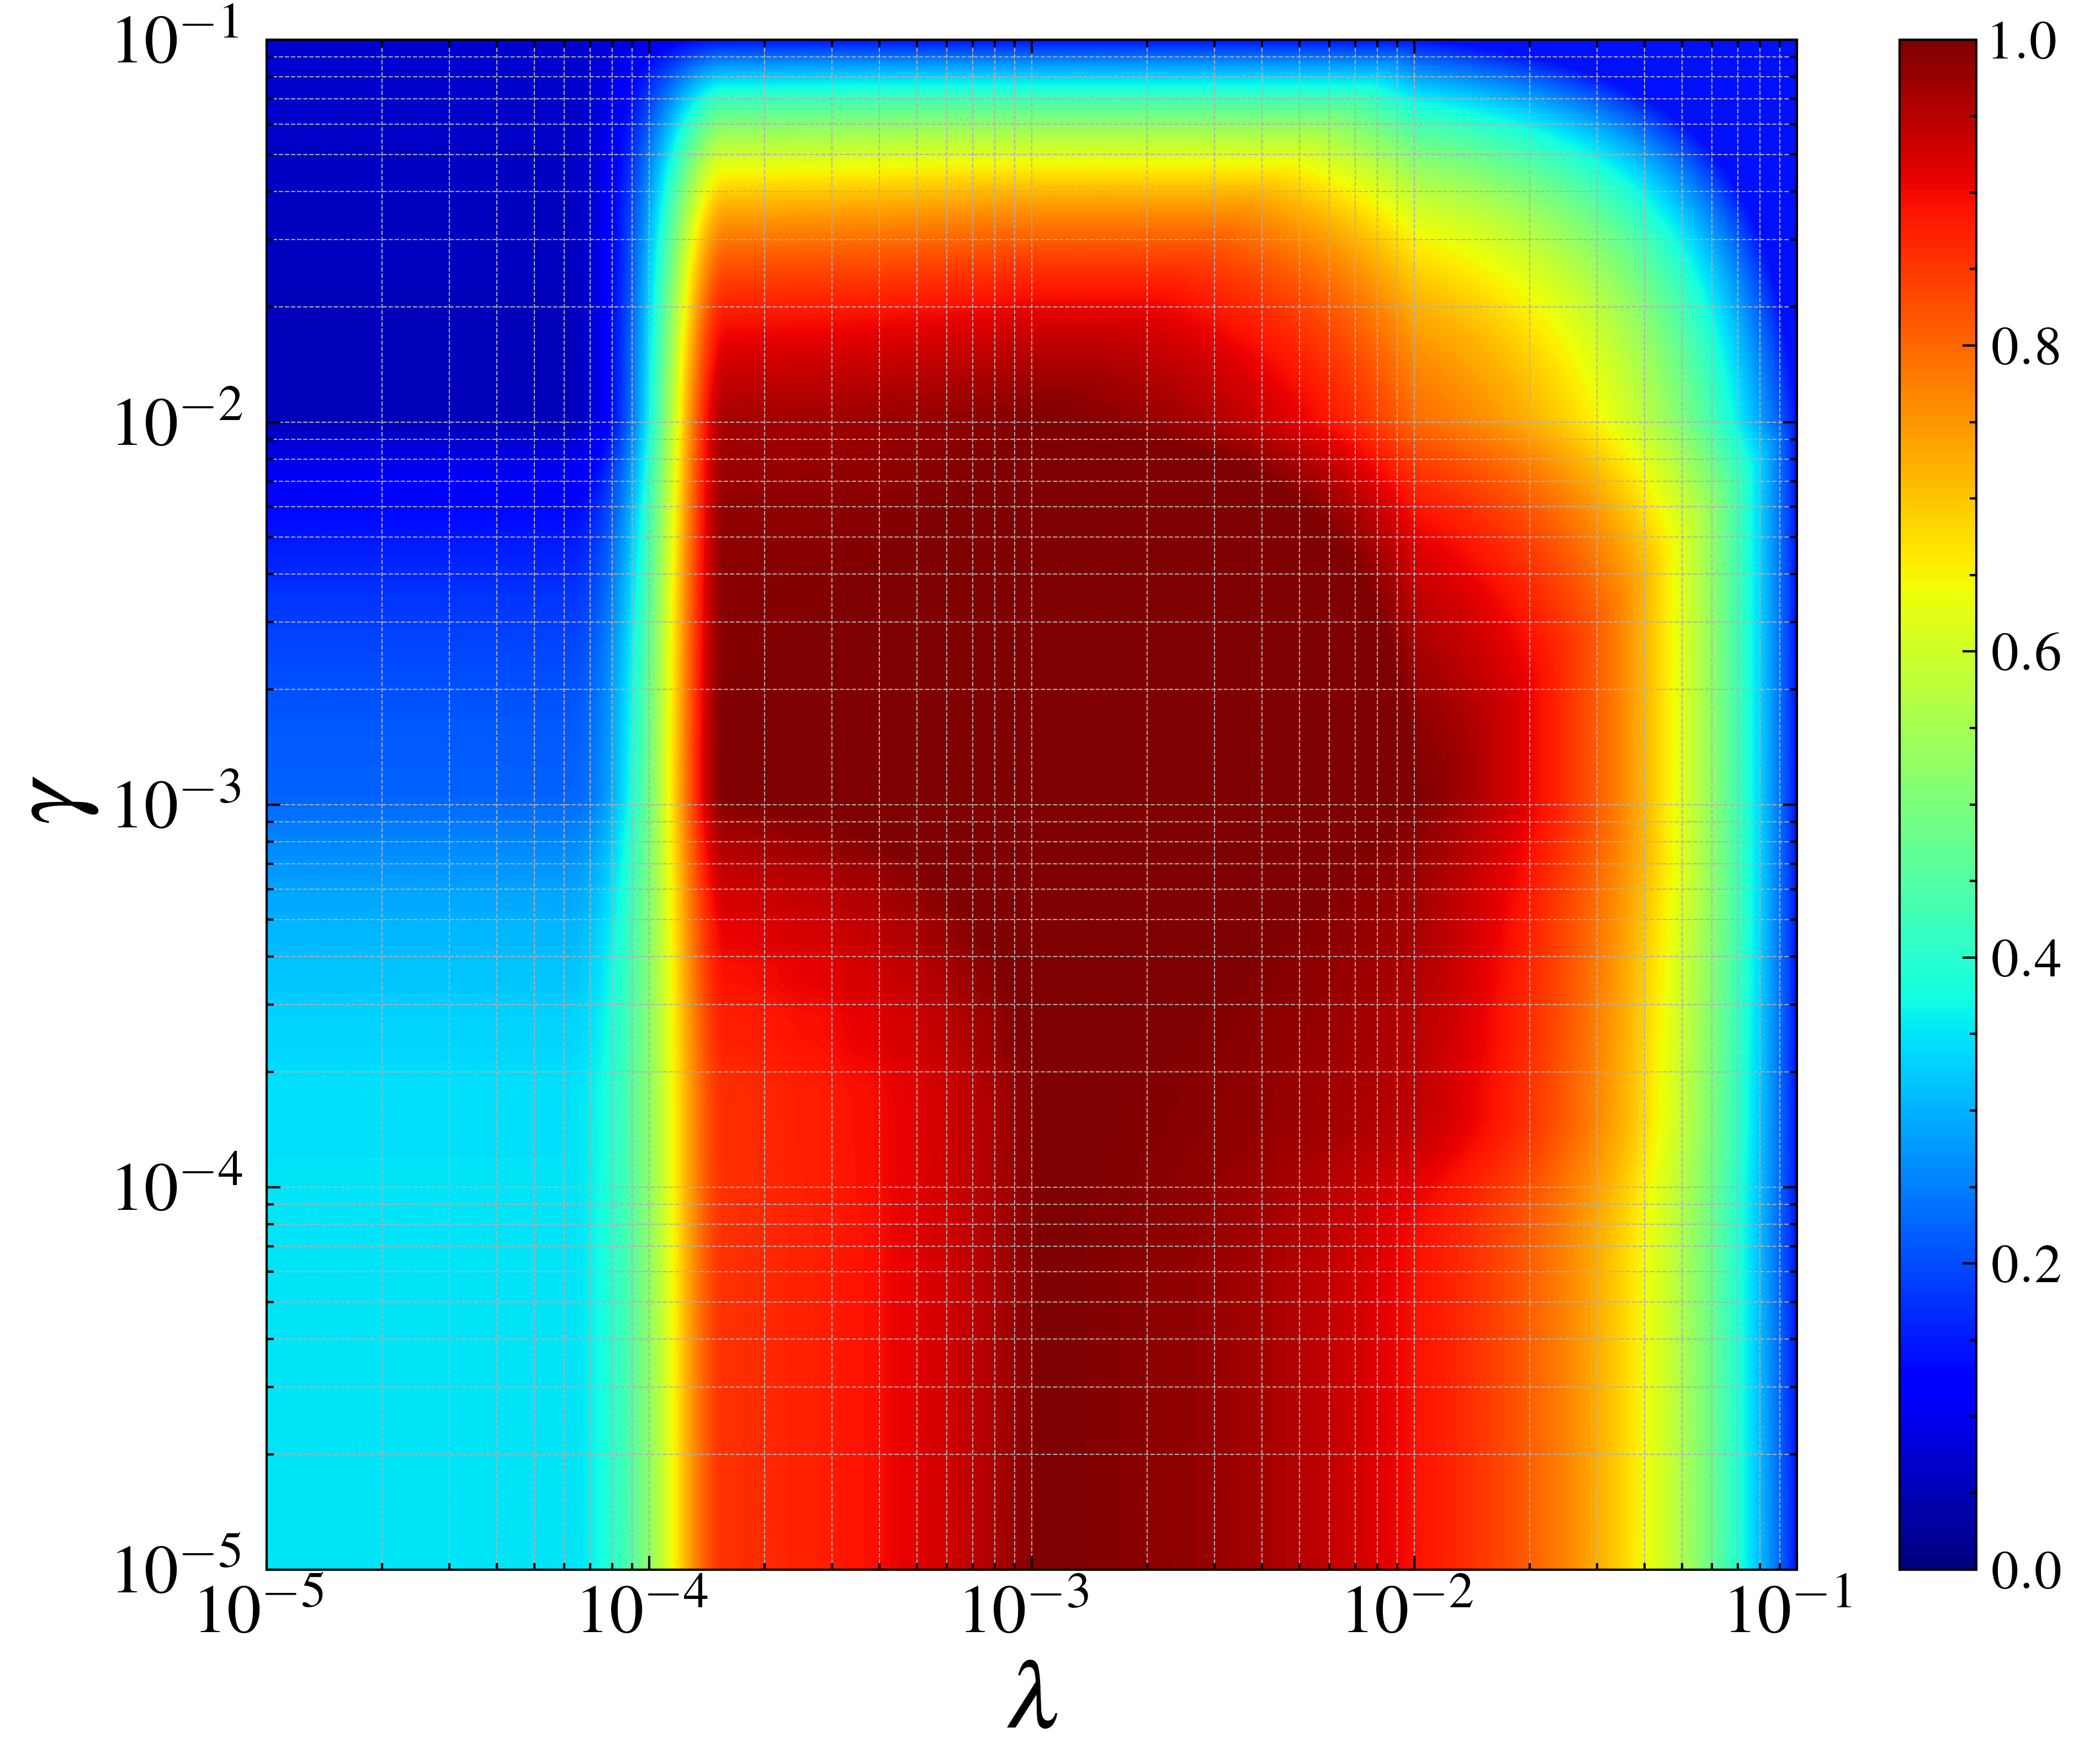

In [18]:
for name,value in matrix_list.items():
    plot_hyperparameters(value['learning_rate'], value['l1_norm'],
                     value['val_acc'], '$\lambda$','$\gamma$',
                     './plot', filename = name, method='linear',log_scale = True,cmap = 'jet',
                      vmin=0, vmax=1)